In [21]:
Packages <- c("dplyr",  "nleqslv", "broom","cubature", "geosphere", "data.table",  "ggplot2", "bbmle", "stringr",  "lubridate", "RColorBrewer", "viridis")

invisible(suppressPackageStartupMessages(lapply(Packages, library, character.only = TRUE)))

setwd('/local/home/katrinac/oceanography')
"%!in%" <- function(x,table) match(x,table, nomatch = 0) == 0

In [184]:
VelFields <- fread("~/oceanography/ROMS/data/camotes_sea_energy.csv")

In [188]:
head(VelFields)

Camotes_Sea_Site,Number_of_ROMS_Ocean_Grid_Cells,u_all_avg,u_all_std,v_all_avg,v_all_std,u_NEM_avg,u_NEM_std,v_NEM_avg,v_NEM_std,...,MKE_NEM_std,MKE_SWM_avg,MKE_SWM_std,EKE_all_avg,EKE_all_std,EKE_NEM_avg,EKE_NEM_std,EKE_SWM_avg,EKE_SWM_std,site
Palanas,1,2.585474,3.221157,-3.597751,4.325512,1.6167407,2.507030,-3.404789,4.475779,...,0,3.3948648,0,36.87234,0,43.43542,0,42.56767,0,Palanas
Wangag,1,2.580433,3.252202,-3.392805,4.140182,1.5892980,2.503947,-3.113366,4.254171,...,0,5.5642343,0,32.96277,0,38.92156,0,38.32967,0,Wangag
Magbangon,1,3.161628,3.442298,-4.145580,4.121940,2.1900489,2.687093,-3.708605,4.085745,...,0,7.4139050,0,29.04418,0,31.69192,0,47.30423,0,Magbangon
Cabatoan,1,3.171860,3.531499,-4.422750,4.177348,2.1924722,2.817397,-3.977144,4.131673,...,0,5.9795851,0,28.02101,0,30.59337,0,49.73987,0,Cabatoan
Caridad_Cemetery,1,1.949397,3.014281,-2.549055,3.418952,1.0510120,2.080710,-2.184393,3.242036,...,0,0.9828874,0,29.64940,0,33.64628,0,44.60667,0,Caridad Cemetery
Caridad_Proper,1,1.735065,2.688279,-2.815742,3.542878,0.9793096,1.936096,-2.480400,3.364972,...,0,14.8028831,0,43.33628,0,40.43026,0,79.46495,0,Caridad Proper


In [191]:
#make the ROMS data tidy
VelFieldsLong <- melt(VelFields[, site := gsub("_", " ", Camotes_Sea_Site)][ #make a site column and drop the lengthier name
    ,-"Camotes_Sea_Site"], , id.vars = c("site", "Number_of_ROMS_Ocean_Grid_Cells"))[#change to long format
    variable %like% "all", time_id := "2012-4"][ #make a time frame column
    variable %like% "NEM", time_id := "NEM"][
    variable %like% "SWM", time_id := "SWM"][
    #variable %like% "EKE_avg", stat := "EKE_avg"][
    variable %like% "avg", stat := "avg"][
    variable %like% "std", stat := "std"][
    variable %like% "u_", feature := "u"][
    variable %like% "v_", feature := "v"][
    variable %like% "EKE", feature := "EKE"][
    variable %like% "MKE", feature := "MKE"]



In [211]:
VelFieldsLong

site,Number_of_ROMS_Ocean_Grid_Cells,variable,value,time_id,stat,feature
Palanas,1,u_all_avg,2.58547426,2012-4,avg,u
Wangag,1,u_all_avg,2.58043292,2012-4,avg,u
Magbangon,1,u_all_avg,3.16162766,2012-4,avg,u
Cabatoan,1,u_all_avg,3.17185964,2012-4,avg,u
Caridad Cemetery,1,u_all_avg,1.94939727,2012-4,avg,u
Caridad Proper,1,u_all_avg,1.73506453,2012-4,avg,u
Hicgop,1,u_all_avg,1.25752254,2012-4,avg,u
Hicgop South,1,u_all_avg,-61.94258322,2012-4,avg,u
Sitio Tugas,1,u_all_avg,1.03099433,2012-4,avg,u
Elementary School,1,u_all_avg,-61.97564709,2012-4,avg,u


In [218]:
TestVel <- left_join(SimConnAggMonsoons, dcast(VelFieldsLong[feature %in% c("u", "v")], site+time_id+stat~ feature, value.var="value"), by=c(source="site"))[source ==dest]

In [95]:
SimConn <- fread(file="~/oceanography/script_output/ROMSDataTables/SimConnectivityTableWithMeta08DayPLD.csv")[source !="Other"][dest !="Other"]

In [193]:
#SimConn is currently formatted so each row is a day. Aggregate interannually and by monsoons to match ROMS feature data
SimConnAggYears<- SimConn[, .(particles_rec_aggregate_years=sum(daily_particles_rec), particles_released_aggregate_years=sum(daily_particles_released)), by=c("source", "dest")][
    , normalized_conn_years := particles_rec_aggregate_years/particles_released_aggregate_years, by=c("source", "dest")]

SimConnAggMonsoons <- SimConn[, .(particles_rec_aggregate_monsoons=sum(daily_particles_rec), particles_released_aggregate_monsoons=sum(daily_particles_released)), by=c("source", "dest")][
    , normalized_conn_monsoons := particles_rec_aggregate_monsoons/particles_released_aggregate_monsoons, by=c("source", "dest")]

SimConnAgg <- left_join(SimConnAggMonsoons, SimConnAggYears)
SimConnAgg

Joining, by = c("source", "dest")


source,dest,particles_rec_aggregate_monsoons,particles_released_aggregate_monsoons,normalized_conn_monsoons,particles_rec_aggregate_years,particles_released_aggregate_years,normalized_conn_years
CAI,Palanas,32,229717440,1.393016e-07,32,229717440,1.393016e-07
CAI,Wangag,10,229717440,4.353174e-08,10,229717440,4.353174e-08
CAI,Magbangon,43,229717440,1.871865e-07,43,229717440,1.871865e-07
CAI,Cabatoan,26,229717440,1.131825e-07,26,229717440,1.131825e-07
CAI,Caridad Cemetery,0,229717440,0.000000e+00,0,229717440,0.000000e+00
CAI,Caridad Proper,2,229717440,8.706348e-09,2,229717440,8.706348e-09
CAI,Hicgop South,1,459434880,2.176587e-09,1,459434880,2.176587e-09
CAI,Sitio Tugas,0,229717440,0.000000e+00,0,229717440,0.000000e+00
CAI,Elementary School,0,229717440,0.000000e+00,0,229717440,0.000000e+00
CAI,Sitio Lonas,0,229717440,0.000000e+00,0,229717440,0.000000e+00


In [ ]:
# I don't think my model structure is optimal. maybe trim down routes to be SR or within sampled area, and then make u and v each columns to test for interaction.

In [195]:
TestSourceFeatures <- left_join(SimConnAgg, VelFieldsLong, by=c(source="site"))[source != "Other"] #joining by the feature data for the SOURCE site
TestDestFeatures <- left_join(SimConnAgg, VelFieldsLong, by=c(dest="site"))[source != "Other"] #joining by the feature data for the DESTINATION site

In [220]:
head(TestVel)

source,dest,particles_rec_aggregate_monsoons,particles_released_aggregate_monsoons,normalized_conn_monsoons,time_id,stat,u,v
CAI,CAI,159712127,229717440,0.6952547,2012-4,avg,2.811295,28.31765
CAI,CAI,159712127,229717440,0.6952547,2012-4,std,15.904073,55.62847
CAI,CAI,159712127,229717440,0.6952547,NEM,avg,0.830784,29.55999
CAI,CAI,159712127,229717440,0.6952547,NEM,std,16.263951,54.93353
CAI,CAI,159712127,229717440,0.6952547,SWM,avg,6.756183,26.14856
CAI,CAI,159712127,229717440,0.6952547,SWM,std,14.851921,56.92452


In [232]:
#source_vel_years <- glm(data=TestVel[time_id =="2012-4" & stat=="avg"][feature== "u" | feature=="v"], normalized_conn_years ~ value , family = binomial(link = logit))

source_avg_v_monsoons <- glm(data=TestVel[time_id !="2012-4" & stat=="avg"], normalized_conn_monsoons ~ v , family = binomial(link = logit))
source_avg_u_monsoons <- glm(data=TestVel[time_id !="2012-4" & stat=="avg"], normalized_conn_monsoons ~ u, family = binomial(link = logit))
source_avg_u_v_monsoons<- glm(data=TestVel[time_id !="2012-4" & stat=="avg"], normalized_conn_monsoons ~ u+v , family = binomial(link = logit))
source_avg_u_v_monsoons_time_id <- glm(data=TestVel[time_id !="2012-4" & stat=="avg"], normalized_conn_monsoons ~ u+v+time_id, family = binomial(link = logit))

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

In [235]:
AIC(source_avg_v_monsoons, source_avg_u_monsoons, source_avg_u_v_monsoons, source_avg_u_v_monsoons_time_id)
summary(source_avg_u_v_monsoons_time_id)



,df,AIC
source_avg_v_monsoons,2,21.43583
source_avg_u_monsoons,2,20.82213
source_avg_u_v_monsoons,3,20.72340
source_avg_u_v_monsoons_time_id,4,22.70807



Call:
glm(formula = normalized_conn_monsoons ~ u + v + time_id, family = binomial(link = logit), 
    data = TestVel[time_id != "2012-4" & stat == "avg"])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7387  -0.3014  -0.2596  -0.1313   1.4133  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -2.87866    1.00513  -2.864  0.00418 **
u            0.03467    0.03599   0.963  0.33546   
v            0.02319    0.02103   1.102  0.27025   
time_idSWM  -0.08954    1.22666  -0.073  0.94181   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 12.218  on 51  degrees of freedom
Residual deviance: 11.218  on 48  degrees of freedom
AIC: 22.708

Number of Fisher Scoring iterations: 6


In [228]:
summary(source_avg_u_v_monsoons)


Call:
glm(formula = normalized_conn_monsoons ~ u + v, family = binomial(link = logit), 
    data = TestVel[time_id != "2012-4" & stat == "avg"])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7515  -0.3032  -0.2635  -0.1358   1.4335  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.92434    0.79605  -3.674 0.000239 ***
u            0.03448    0.03590   0.961 0.336784    
v            0.02310    0.02103   1.099 0.271913    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 12.218  on 51  degrees of freedom
Residual deviance: 11.224  on 49  degrees of freedom
AIC: 20.723

Number of Fisher Scoring iterations: 6


In [152]:
summary(source_avg_MKE_mod_monsoons)
summary(source_avg_MKE_mod_years)


Call:
glm(formula = normalized_conn_years ~ value, family = binomial(link = logit), 
    data = TestSourceFeatures[time_id != "2012-4" & stat == "avg" & 
        feature == "MKE"])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.09725  -0.09336  -0.08229  -0.04595   2.51344  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.349135   0.538913  -9.926   <2e-16 ***
value       -0.002615   0.024978  -0.105    0.917    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 33.121  on 1351  degrees of freedom
Residual deviance: 33.110  on 1350  degrees of freedom
AIC: 37.997

Number of Fisher Scoring iterations: 8



Call:
glm(formula = normalized_conn_years ~ value, family = binomial(link = logit), 
    data = TestSourceFeatures[time_id == "2012-4" & stat == "avg" & 
        feature == "MKE"])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.09768  -0.09293  -0.08302  -0.04586   2.51341  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.32077    1.03008  -5.165  2.4e-07 ***
value       -0.01182    0.15430  -0.077    0.939    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 16.561  on 675  degrees of freedom
Residual deviance: 16.555  on 674  degrees of freedom
AIC: 21.012

Number of Fisher Scoring iterations: 8


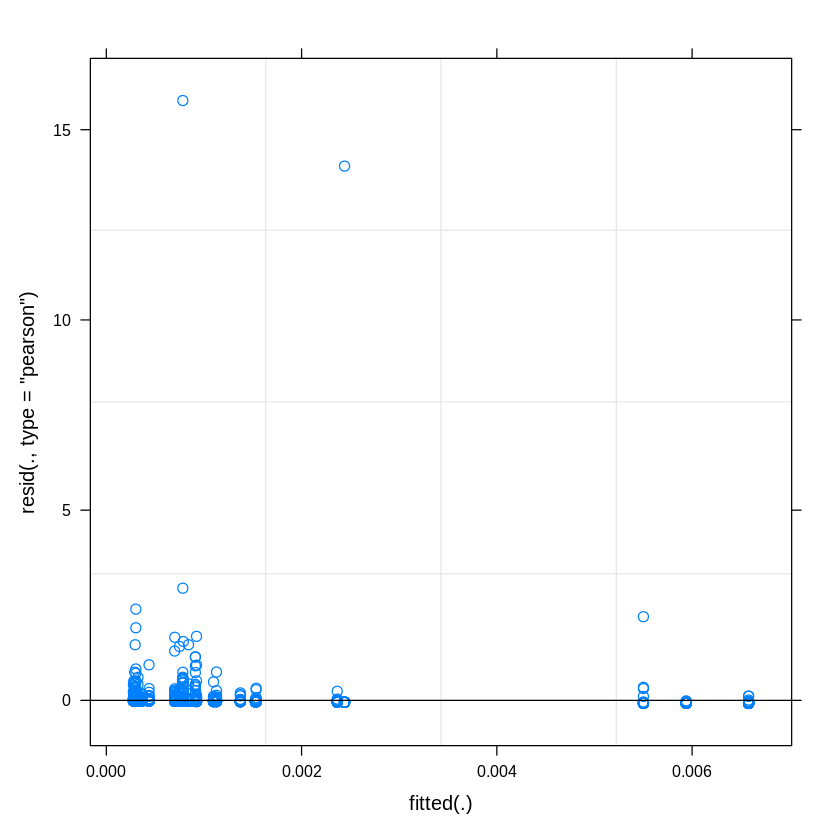

In [124]:
plot(source_avg_EKE_mod)

In [115]:
summary(TestSourceFeatures$normalized_conn_years)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0000333 0.0003074 0.0045530 0.0018622 0.6952547 

In [104]:
tail(TestSourceFeatures)

source,dest,particles_rec_aggregate_monsoons,particles_released_aggregate_monsoons,normalized_conn_monsoons,particles_rec_aggregate_years,particles_released_aggregate_years,normalized_conn_years,Number_of_ROMS_Ocean_Grid_Cells,variable,value,time_id,stat,feature
Palanas,CAI,3318,922560,0.003596514,3318,922560,0.003596514,1,EKE_all_avg,36.87234,2012-4,avg,EKE
Palanas,CAI,3318,922560,0.003596514,3318,922560,0.003596514,1,EKE_all_std,0.00000,2012-4,std,EKE
Palanas,CAI,3318,922560,0.003596514,3318,922560,0.003596514,1,EKE_NEM_avg,43.43542,NEM,avg,EKE
Palanas,CAI,3318,922560,0.003596514,3318,922560,0.003596514,1,EKE_NEM_std,0.00000,NEM,std,EKE
Palanas,CAI,3318,922560,0.003596514,3318,922560,0.003596514,1,EKE_SWM_avg,42.56767,SWM,avg,EKE
Palanas,CAI,3318,922560,0.003596514,3318,922560,0.003596514,1,EKE_SWM_std,0.00000,SWM,std,EKE
